# Detecting the Human faces using Yolov3 in TensorFlow
 
There are different algorithms for detecting the custom objects from images and videos but [Yolo](https://pjreddie.com/darknet/) algotithm makes detections fastest . Currently Yolov5 is latest.

YOLO v1 was introduced in May 2016 by Joseph Redmon with paper “You Only Look Once: Unified, Real-Time Object Detection.” This was one of the biggest evolution in real-time object detection.

In December 2017, Joseph introduced another version of YOLO with paper “YOLO9000: Better, Faster, Stronger.” it was also known as YOLO 9000.
After a year in April 2018, the most popular and stable version of YOLO was introduced. Joseph had a partner this time and they released YOLOv3 with paper “YOLOv3: An Incremental Improvement”.

Finally, in April 2020, Alexey Bochkovskiy introduced YOLOv4 with paper “YOLOv4: Optimal Speed and Accuracy of Object Detection” Alexey is not the official author of previous versions of YOLO but Joseph and Ali took a step back from YOLO someone has to handle the era.

After a few days on 9 June 2020, just four days back another unofficial author Glenn Jocher released YOLOv5. There are lots of controversies about the selection of the name “YOLOv5” and other stuff. Glenn introduced PyTorch based version of YOLOv5 with exceptional improvements. Hence he has not released any official paper yet.



* In this repository i m using the Yolov3 for face detection. I have trained the model directly with the darknet with fee the few modidfications .[click here](https://github.com/Rajatkhatri7/Face-With-Yolo/blob/master/YOLOv3_Training.ipynb) to see the training process on custom dataset.

As i writed codes on the different files in repository for better view. Clone the repository and follow the steps below.
```
git clone https://github.com/Rajatkhatri7/Face-With-Yolo

```

In [1]:
#cloning the repo
!git clone https://github.com/Rajatkhatri7/Face-With-Yolo

Cloning into 'Face-With-Yolo'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 82 (delta 19), reused 43 (delta 2), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [2]:
# helper function to show the image
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [3]:

#mounting the google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [5]:
%cd content
#symbolic link for drive for easyness as My\Drive making some issue in file path 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ln /mydrive

/content


## This is important

As i cannot add the weights file to the github repo because of it size so copy the weights file from this [link](https://drive.google.com/file/d/1-7VwHN6bBbcQ9CZTQzDLSDGCL6MJkDus/view?usp=sharing) and paste it your weights folder.

# Converting the weights to the Tensorflow format
As I trained the model in the darknet (C language) so for detection we will convert those weights to the Tensorflow format 

In [8]:
%cd Face-With-Yolo


/content/Face-With-Yolo


In [9]:
!pip install -r requirements.txt

In [13]:
#converitng the weights
!python load_weights.py

2020-10-02 19:39:17.555444: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-02 19:39:19.958347: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-02 19:39:19.968328: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-10-02 19:39:19.968393: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eb9fbaaa9a92): /proc/driver/nvidia/version does not exist
2020-10-02 19:39:20.001589: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2200000000 Hz
2020-10-02 19:39:20.001917: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x245d100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-10-02 19:39:20.001964: I tensorflow/com

Now you can see that weights checkpoints files are now saved to the weights folder

Now we will run the detection with detect_video.py file.
You can see the codes in the yolov3_tf2 folder.
As colab has issues in playing the videos i remmoand to run the repository locally on your computer for videos

In [16]:
#detecting faces in the images
!python detect.py --images "data/images/meme.jpg, data/images/office.jpg"


2020-10-02 19:45:59.888276: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-02 19:46:02.309826: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-02 19:46:02.319945: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-10-02 19:46:02.320011: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eb9fbaaa9a92): /proc/driver/nvidia/version does not exist
2020-10-02 19:46:02.350994: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2200000000 Hz
2020-10-02 19:46:02.351419: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1c3d100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-10-02 19:46:02.351476: I tensorflow/com

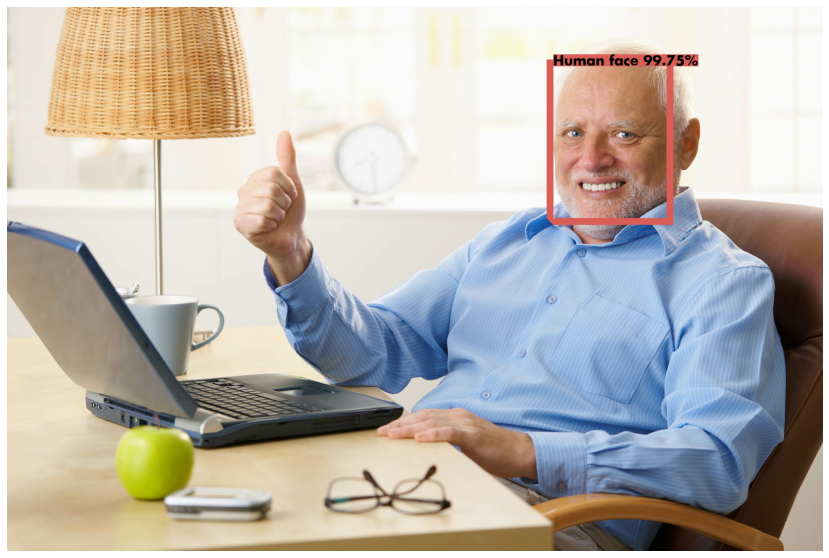

In [18]:
## Detected files are stored under the Detections folder
imShow("detections/detection1.jpg")

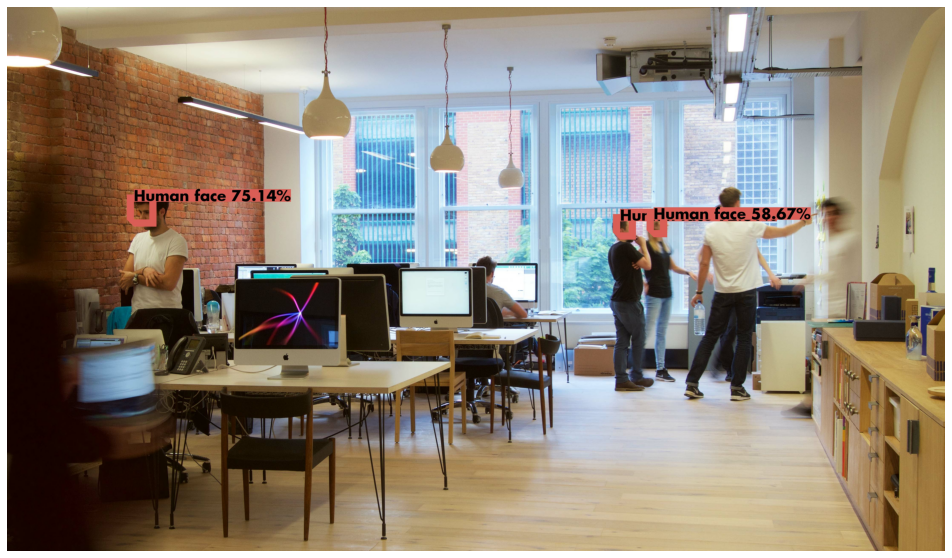

In [19]:
imShow("detections/detection2.jpg")

# Refrence: 
* https://github.com/thtrieu/darkflow
* https://github.com/qqwweee/keras-yolo3
* https://github.com/ManivannanMurugavel/YOLO-Annotation-Tool
* https://github.com/heartkilla/yolo-v3
